In [2]:
%matplotlib notebook
%load_ext autoreload
%pwd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'/ocean/projects/asc170022p/mtragoza/lung-project/notebooks'

In [3]:
import os
os.environ['PKG_CONFIG_PATH'] = '/ocean/projects/asc170022p/mtragoza/mambaforge/envs/4DCT/lib/pkgconfig'
import sys
sys.path.append('..')
import mycode as code

--------------------------------------------------------------------------
but there are no active ports detected (or Open MPI was unable to use
them).  This is most certainly not what you wanted.  Check your
cables, subnet manager configuration, etc.  The openib BTL will be
ignored for this job.

  Local host: dv001
--------------------------------------------------------------------------


In [4]:
ds = code.imaging.Emory4DCTDataset('../data/Emory-4DCT')
ds

Emory4DCTDataset([
  Emory4DCTCase('../data/Emory-4DCT', 'Case1Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case2Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case3Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case4Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case5Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case6Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case7Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case8Deploy', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case9Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case10Pack', 10 phases)
])

In [5]:
ds.load_images()

Loading ../data/Emory-4DCT/Case1Pack/Images/case1_T00_s.img
Loading ../data/Emory-4DCT/Case1Pack/Images/case1_T10_s.img
Loading ../data/Emory-4DCT/Case1Pack/Images/case1_T20_s.img
Loading ../data/Emory-4DCT/Case1Pack/Images/case1_T30_s.img
Loading ../data/Emory-4DCT/Case1Pack/Images/case1_T40_s.img
Loading ../data/Emory-4DCT/Case1Pack/Images/case1_T50_s.img
Loading ../data/Emory-4DCT/Case1Pack/Images/case1_T60_s.img
Loading ../data/Emory-4DCT/Case1Pack/Images/case1_T70_s.img
Loading ../data/Emory-4DCT/Case1Pack/Images/case1_T80_s.img
Loading ../data/Emory-4DCT/Case1Pack/Images/case1_T90_s.img
Loading ../data/Emory-4DCT/Case2Pack/Images/case2_T00-ssm.img
Loading ../data/Emory-4DCT/Case2Pack/Images/case2_T10-ssm.img
Loading ../data/Emory-4DCT/Case2Pack/Images/case2_T20-ssm.img
Loading ../data/Emory-4DCT/Case2Pack/Images/case2_T30-ssm.img
Loading ../data/Emory-4DCT/Case2Pack/Images/case2_T40-ssm.img
Loading ../data/Emory-4DCT/Case2Pack/Images/case2_T50-ssm.img
Loading ../data/Emory-4DCT/C

In [72]:
ds.load_masks(roi='lung_combined_mask')

Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T00/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T10/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T20/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T30/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T40/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T50/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T60/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T70/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T80/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T90/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case2Pack/TotalSegment/case2_T00/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case2Pack/TotalSegment/case

FileNotFoundError: No such file or no access: '../data/Emory-4DCT/Case8Deploy/TotalSegment/case8_T00/lung_combined_mask.nii.gz'

In [86]:
%autoreload
import torch
sys.path.append('../../Lung250M-4B')
import corrfield
corrfield.corrfield.corrfield

<function corrfield.corrfield.corrfield(img_fix, mask_fix, img_mov, alpha=2.5, beta=150.0, gamma=5.0, delta=1, lambd=0.0, sigma=1.4, sigma1=1.0, L=[16, 8], N=[6, 3], Q=[2, 1], R=[3, 2], T=['n', 'n'])>

In [57]:
%%time

img_fix = torch.from_numpy(ds.cases[0].array.sel(phase=50).data.copy()).unsqueeze(0).unsqueeze(0).to('cuda', torch.float32)
img_mov = torch.from_numpy(ds.cases[0].array.sel(phase=0).data.copy()).unsqueeze(0).unsqueeze(0).to('cuda', torch.float32)
mask_fix = torch.from_numpy(ds.cases[0].array.sel(phase=50).data.copy()).unsqueeze(0).unsqueeze(0).to('cuda', torch.float32)

print(img_fix.shape, img_fix.dtype)
print(img_mov.shape, img_mov.dtype)
print(mask_fix.shape, mask_fix.dtype)

dense_flow, kpts_fix, kpts_mov = corrfield.corrfield.corrfield(img_fix, mask_fix, img_mov)

print(flow.shape, flow.dtype)
print(kpts_fix.shape, kpts_mov.dtype)
print(kpts_mov.shape, kpts_mov.dtype)

torch.Size([1, 1, 256, 256, 94]) torch.float32
torch.Size([1, 1, 256, 256, 94]) torch.float32
torch.Size([1, 1, 256, 256, 94]) torch.float32
Compute fixed MIND features ... finished (4.71 s).
Stage 1/2
    search radius: 16
      cube length: 6
     quantisation: 2
     patch radius: 3
        transform: n
    Compute moving MIND features ... finished (0.04 s).
    5515 fixed keypoints extracted (0.21 s).
    Compute forward marginals ... finished (5.88 s).
    Compute symmetric backward marginals ... finished (4.23 s).
    Dense thin plate spline interpolation ... finished (1.09 s).

Stage 2/2
    search radius: 8
      cube length: 3
     quantisation: 1
     patch radius: 2
        transform: n
    Compute moving MIND features ... finished (0.04 s).
    11220 fixed keypoints extracted (0.03 s).
    Compute forward marginals ... finished (3.66 s).
    Compute symmetric backward marginals ... finished (3.65 s).
    Dense thin plate spline interpolation ... finished (0.90 s).

torch.Si

In [65]:
# verify registration result
import torch.nn.functional as F

_, _, D, H, W = img_fix.shape

img_mov_warped = F.grid_sample(
    img_mov,
    F.affine_grid(
        torch.eye(3, 4, dtype=img_mov.dtype, device='cuda').unsqueeze(0),
        (1, 1, D, H, W),
        align_corners=True
    ) + corrfield.utils.flow_pt(
        dense_flow.view(1, -1, 3), (D, H, W), align_corners=True
    ).view(1, D, H, W, 3).to(img_mov.dtype),
    align_corners=True
)
print(img_mov_warped.shape, img_mov_warped.dtype)

img_mse_init = ((img_fix - img_mov)**2).mean().item()
img_mse_warp = ((img_fix - img_mov_warped)**2).mean().item()
print(img_mse_init)
print(img_mse_warp)

torch.Size([1, 1, 256, 256, 94]) torch.float32
11068.681640625
4127.78955078125


In [93]:
%autoreload
ds.cases[0].load_masks(roi='lung_combined_mask')
ds.cases[0].register(fixed_phase=50)

Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T00/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T10/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T20/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T30/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T40/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T50/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T60/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T70/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T80/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T90/lung_combined_mask.nii.gz
Compute fixed MIND features ... finished (4.42 s).
Stage 1/2
    search radius: 16
      cube length: 6
     quantisation: 2
     patch radi

    Compute forward marginals ... finished (0.35 s).
    Compute symmetric backward marginals ... finished (0.37 s).
    Dense thin plate spline interpolation ... finished (0.08 s).

Compute fixed MIND features ... finished (0.04 s).
Stage 1/2
    search radius: 16
      cube length: 6
     quantisation: 2
     patch radius: 3
        transform: n
    Compute moving MIND features ... finished (0.04 s).
    669 fixed keypoints extracted (0.04 s).
    Compute forward marginals ... finished (0.50 s).
    Compute symmetric backward marginals ... finished (0.49 s).
    Dense thin plate spline interpolation ... finished (0.04 s).

Stage 2/2
    search radius: 8
      cube length: 3
     quantisation: 1
     patch radius: 2
        transform: n
    Compute moving MIND features ... finished (0.04 s).
    1318 fixed keypoints extracted (0.03 s).
    Compute forward marginals ... finished (0.35 s).
    Compute symmetric backward marginals ... finished (0.38 s).
    Dense thin plate spline interp

<IPython.core.display.Javascript object>


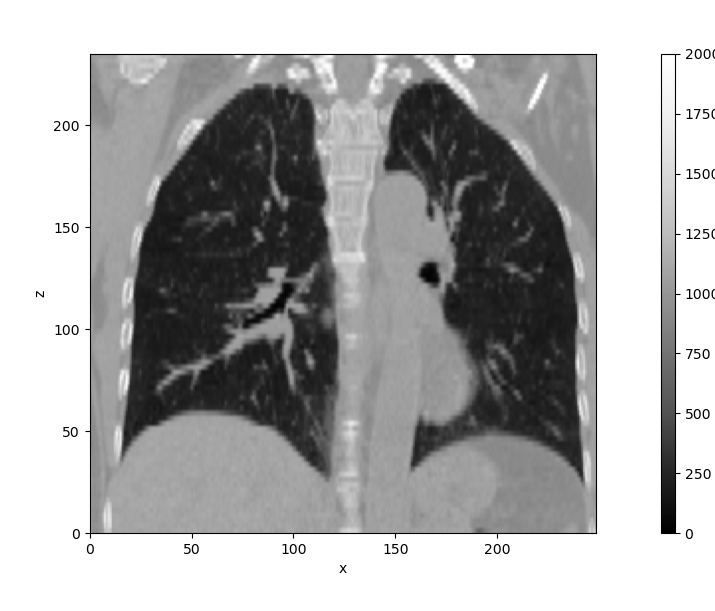

interactive(children=(SelectionSlider(description='phase', options=((0, 0), (10, 1), (20, 2), (30, 3), (40, 4)…

In [94]:
code.visual.XArrayViewer(
    ds.cases[0].array, x='x', y='z', cmap='Greys_r', vmin=0, vmax=2000
)

<IPython.core.display.Javascript object>


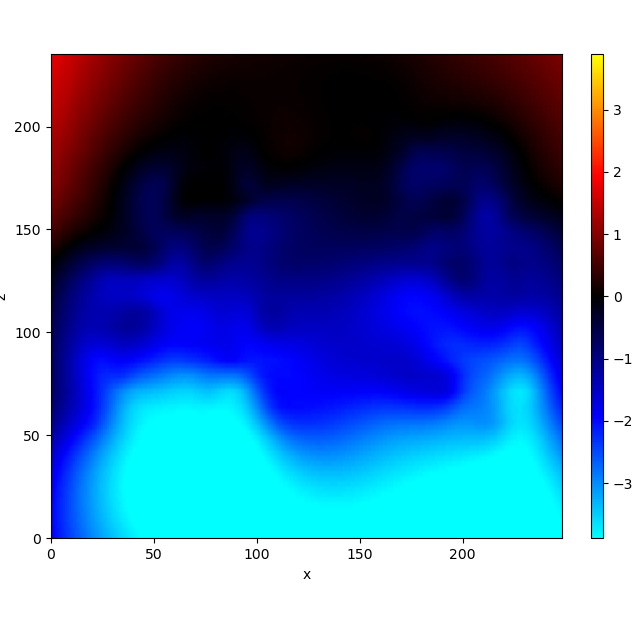

interactive(children=(SelectionSlider(description='phase', options=((0, 0), (10, 1), (20, 2), (30, 3), (40, 4)…

In [95]:
code.visual.XArrayViewer(
    ds.cases[0].disp, x='x', y='z'
)